In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\hey\OneDrive\Bureau\forcating\data\global.csv')
df.head()

,Perimetre,Date,Heures,Consommation,PrevisionJ1,Prevision J,Fioul,Charbon,Gaz,Nucleaire,...,HydrauliqueFil,HydrauliqueLacs,HydrauliqueSTEPturbinage,BioenergiesDechets,BioenergiesBiomasse,BioenergiesBiogaz,Stockage batterie,Destockagebatterie,Eolienterrestre,Eolienoffshore
0,France,1/1/2022,0:00,54615.0,51500,54200,89.0,14.0,2961.0,41560.0,...,6300.0,1439.0,980.0,554.0,349.0,345.0,0.0,0.0,0.0,0.0
1,France,1/1/2022,0:15,NaN,51100,53750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,1/1/2022,0:30,54015.0,50700,53300,99.0,13.0,2691.0,39434.0,...,6047.0,2494.0,1672.0,551.0,359.0,336.0,0.0,0.0,0.0,0.0
3,France,1/1/2022,0:45,NaN,49850,52400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,1/1/2022,1:00,52108.0,49000,51500,99.0,14.0,2691.0,38697.0,...,5998.0,2388.0,632.0,557.0,356.0,339.0,0.0,0.0,0.0,0.0


In [3]:
df.tail()

,Perimetre,Date,Heures,Consommation,PrevisionJ1,Prevision J,Fioul,Charbon,Gaz,Nucleaire,...,HydrauliqueFil,HydrauliqueLacs,HydrauliqueSTEPturbinage,BioenergiesDechets,BioenergiesBiomasse,BioenergiesBiogaz,Stockage batterie,Destockagebatterie,Eolienterrestre,Eolienoffshore
35035,France,12/31/2022,22:45,NaN,45800,45500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35036,France,12/31/2022,23:00,47688.0,47000,46700,76.0,23.0,2514.0,25788.0,...,5244.0,1425.0,367.0,522.0,429.0,335.0,0.0,0.0,0.0,0.0
35037,France,12/31/2022,23:15,NaN,47250,47000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35038,France,12/31/2022,23:30,47519.0,47500,47300,76.0,23.0,2474.0,25671.0,...,5204.0,1140.0,307.0,527.0,430.0,334.0,0.0,0.0,0.0,0.0
35039,France,12/31/2022,23:45,NaN,47050,46950,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Perimetre                 35040 non-null  object 
 1   Date                      35040 non-null  object 
 2   Heures                    35040 non-null  object 
 3   Consommation              17520 non-null  float64
 4   PrevisionJ1               35040 non-null  int64  
 5   Prevision J               35040 non-null  int64  
 6   Fioul                     17520 non-null  float64
 7   Charbon                   17520 non-null  float64
 8   Gaz                       17520 non-null  float64
 9   Nucleaire                 17520 non-null  float64
 10  Eolien                    17520 non-null  float64
 11  Solaire                   17520 non-null  float64
 12  Hydraulique               17520 non-null  float64
 13  Pompage                   17520 non-null  float64
 14  Bioene

In [5]:
df.dtypes

Perimetre                    object
Date                         object
Heures                       object
Consommation                float64
PrevisionJ1                   int64
Prevision J                   int64
Fioul                       float64
Charbon                     float64
Gaz                         float64
Nucleaire                   float64
Eolien                      float64
Solaire                     float64
Hydraulique                 float64
Pompage                     float64
Bioenergies                 float64
Echphysiques                float64
TauxdeCo                    float64
EchcommAngleterre           float64
EchcommEspagne              float64
EchcommItalie               float64
EchcommSuisse               float64
EchcommAllemagneBelgique    float64
FioulTAC                    float64
FioulCogen                  float64
FioulAutres                 float64
GazTAC                      float64
GazCogen                    float64
GazCCG                      

In [6]:
df.describe()

,Consommation,PrevisionJ1,Prevision J,Fioul,Charbon,Gaz,Nucleaire,Eolien,Solaire,Hydraulique,...,HydrauliqueFil,HydrauliqueLacs,HydrauliqueSTEPturbinage,BioenergiesDechets,BioenergiesBiomasse,BioenergiesBiogaz,Stockage batterie,Destockagebatterie,Eolienterrestre,Eolienoffshore
count,17520.000000,35040.000000,35040.000000,17520.000000,17520.000000,17520.000000,17520.00000,17520.000000,17520.000000,17520.000000,...,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.0,17520.0,17520.0,17520.0
mean,51387.245320,50812.998002,50749.536815,129.371689,327.157420,5017.814269,31827.00742,4410.407306,2082.237842,5609.546632,...,3733.709018,1188.963014,686.879966,503.958961,361.781564,338.653938,0.0,0.0,0.0,0.0
std,11384.274635,11268.553684,11136.418051,166.524448,530.203692,2079.588201,7712.31188,3517.249845,2956.130739,2499.363942,...,1295.424772,954.162371,780.493942,39.824529,59.770958,11.479132,0.0,0.0,0.0,0.0
min,30845.000000,29800.000000,29800.000000,48.000000,0.000000,393.000000,19164.00000,96.000000,0.000000,1531.000000,...,1209.000000,49.000000,2.000000,375.000000,244.000000,266.000000,0.0,0.0,0.0,0.0
25%,42814.750000,42350.000000,42400.000000,72.000000,15.000000,3684.000000,26310.00000,1848.000000,1.000000,3764.000000,...,2656.000000,556.000000,82.000000,476.000000,313.000000,331.000000,0.0,0.0,0.0,0.0
50%,49296.000000,48800.000000,48700.000000,87.000000,23.000000,4696.000000,28945.50000,3213.000000,45.000000,5200.000000,...,3649.000000,924.500000,398.500000,506.000000,345.000000,339.000000,0.0,0.0,0.0,0.0
75%,58877.500000,57800.000000,57650.000000,110.000000,533.250000,6466.000000,36278.75000,5925.250000,3831.500000,6847.000000,...,4742.000000,1519.000000,1054.000000,533.000000,423.000000,346.000000,0.0,0.0,0.0,0.0
max,86978.000000,85600.000000,86700.000000,1729.000000,1790.000000,10611.000000,49647.00000,16363.000000,10863.000000,17023.000000,...,7224.000000,6900.000000,4293.000000,615.000000,516.000000,370.000000,0.0,0.0,0.0,0.0


In [7]:
df.columns

Index(['Perimetre', 'Date', 'Heures', 'Consommation', 'PrevisionJ1',
       'Prevision J', 'Fioul', 'Charbon', 'Gaz', 'Nucleaire', 'Eolien',
       'Solaire', 'Hydraulique', 'Pompage', 'Bioenergies', 'Echphysiques',
       'TauxdeCo', 'EchcommAngleterre', 'EchcommEspagne', 'EchcommItalie',
       'EchcommSuisse', 'EchcommAllemagneBelgique', 'FioulTAC', 'FioulCogen',
       'FioulAutres', 'GazTAC', 'GazCogen', 'GazCCG', 'GazAutres',
       'HydrauliqueFil ', 'HydrauliqueLacs', 'HydrauliqueSTEPturbinage',
       'BioenergiesDechets', 'BioenergiesBiomasse', 'BioenergiesBiogaz',
       ' Stockage batterie', 'Destockagebatterie', 'Eolienterrestre',
       'Eolienoffshore'],
      dtype='object')

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Perimetre                   0
Date                        0
Heures                      0
Consommation                0
PrevisionJ1                 0
Prevision J                 0
Fioul                       0
Charbon                     0
Gaz                         0
Nucleaire                   0
Eolien                      0
Solaire                     0
Hydraulique                 0
Pompage                     0
Bioenergies                 0
Echphysiques                0
TauxdeCo                    0
EchcommAngleterre           0
EchcommEspagne              0
EchcommItalie               0
EchcommSuisse               0
EchcommAllemagneBelgique    0
FioulTAC                    0
FioulCogen                  0
FioulAutres                 0
GazTAC                      0
GazCogen                    0
GazCCG                      0
GazAutres                   0
HydrauliqueFil              0
HydrauliqueLacs             0
HydrauliqueSTEPturbinage    0
BioenergiesDechets          0
Bioenergie

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
# Define seasons
def get_season(date):
    year = date.year
    seasons = {
        'spring': pd.date_range(start=f'{year}-03-21', end=f'{year}-06-20'),
        'summer': pd.date_range(start=f'{year}-06-21', end=f'{year}-09-22'),
        'autumn': pd.date_range(start=f'{year}-09-23', end=f'{year}-12-20'),
        'winter': pd.date_range(start=f'{year}-12-21', end=f'{year+1}-03-20')
    }
    for season, date_range in seasons.items():
        if date in date_range:
            return season
    return 'winter'  
df['season'] =df['Date'].apply(get_season)


In [11]:
# Define periods of the day
def get_period_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [12]:
df.head()

,Perimetre,Date,Heures,Consommation,PrevisionJ1,Prevision J,Fioul,Charbon,Gaz,Nucleaire,...,HydrauliqueLacs,HydrauliqueSTEPturbinage,BioenergiesDechets,BioenergiesBiomasse,BioenergiesBiogaz,Stockage batterie,Destockagebatterie,Eolienterrestre,Eolienoffshore,season
0,France,2022-01-01,0:00,54615.0,51500,54200,89.0,14.0,2961.0,41560.0,...,1439.0,980.0,554.0,349.0,345.0,0.0,0.0,0.0,0.0,winter
2,France,2022-01-01,0:30,54015.0,50700,53300,99.0,13.0,2691.0,39434.0,...,2494.0,1672.0,551.0,359.0,336.0,0.0,0.0,0.0,0.0,winter
4,France,2022-01-01,1:00,52108.0,49000,51500,99.0,14.0,2691.0,38697.0,...,2388.0,632.0,557.0,356.0,339.0,0.0,0.0,0.0,0.0,winter
6,France,2022-01-01,1:30,52239.0,49400,52200,99.0,13.0,2695.0,38594.0,...,2080.0,1167.0,563.0,349.0,345.0,0.0,0.0,0.0,0.0,winter
8,France,2022-01-01,2:00,51803.0,48700,51200,99.0,13.0,2680.0,38102.0,...,2095.0,1071.0,564.0,345.0,335.0,0.0,0.0,0.0,0.0,winter


In [13]:
df.columns

Index(['Perimetre', 'Date', 'Heures', 'Consommation', 'PrevisionJ1',
       'Prevision J', 'Fioul', 'Charbon', 'Gaz', 'Nucleaire', 'Eolien',
       'Solaire', 'Hydraulique', 'Pompage', 'Bioenergies', 'Echphysiques',
       'TauxdeCo', 'EchcommAngleterre', 'EchcommEspagne', 'EchcommItalie',
       'EchcommSuisse', 'EchcommAllemagneBelgique', 'FioulTAC', 'FioulCogen',
       'FioulAutres', 'GazTAC', 'GazCogen', 'GazCCG', 'GazAutres',
       'HydrauliqueFil ', 'HydrauliqueLacs', 'HydrauliqueSTEPturbinage',
       'BioenergiesDechets', 'BioenergiesBiomasse', 'BioenergiesBiogaz',
       ' Stockage batterie', 'Destockagebatterie', 'Eolienterrestre',
       'Eolienoffshore', 'season'],
      dtype='object')

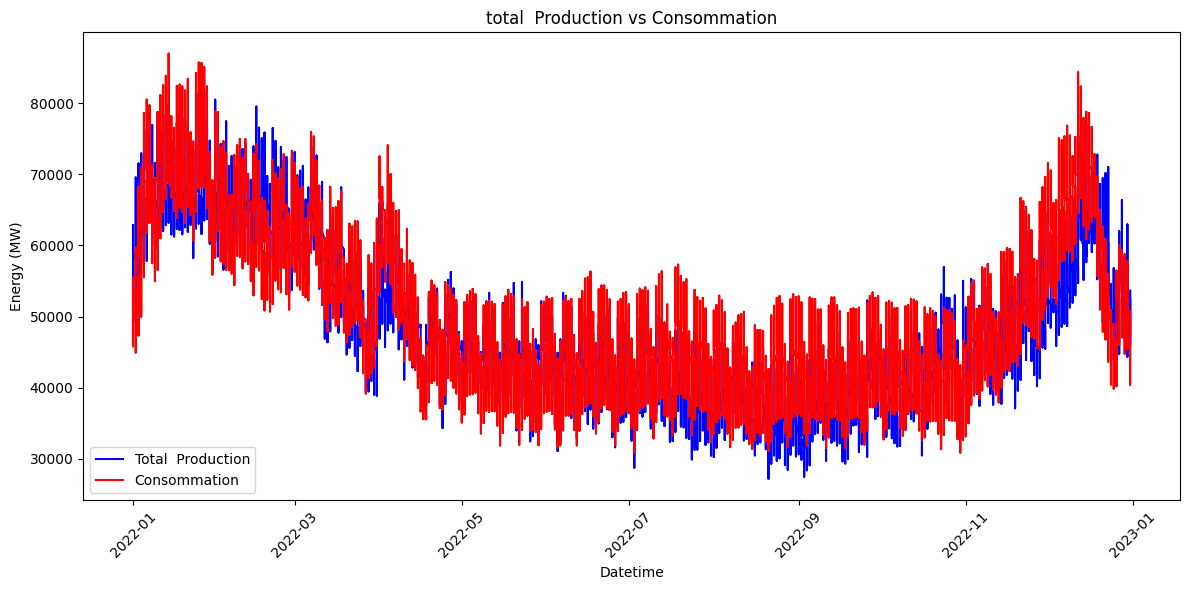

In [14]:
df['Total_production'] = df['Fioul'] + df['Charbon'] + df['Gaz'] +df['Nucleaire'] +df['Eolien'] +df['Solaire'] +df['Hydraulique'] +df['Pompage'] +df['Bioenergies']

# Plottotla  production vs. consumption
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total_production'], label='Total  Production', color='blue')
plt.plot(df['Date'], df['Consommation'], label='Consommation', color='red')
plt.xlabel('Datetime')
plt.ylabel('Energy (MW)')
plt.title('total  Production vs Consommation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ML  consumption vs production

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [16]:
# Define input and output
X = df[['Total_production']]
y = df['Consommation']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Make predictions
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 3306.900731025097
MSE: 17149178.89188826
RMSE: 4141.1567094096135


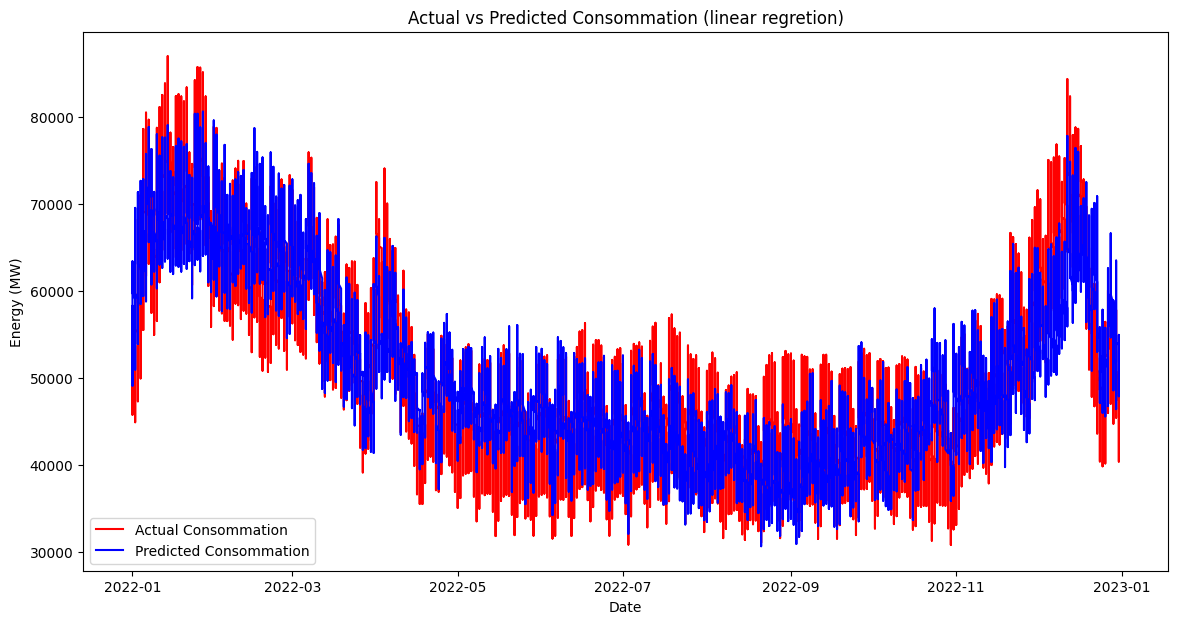

In [22]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Consommation'], color='red', label='Actual Consommation')
plt.plot(df['Date'], model.predict(X), color='blue', label='Predicted Consommation')
plt.xlabel('Date')
plt.ylabel('Energy (MW)')
plt.title('Actual vs Predicted Consommation (linear regretion)')
plt.legend()
plt.show()

c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


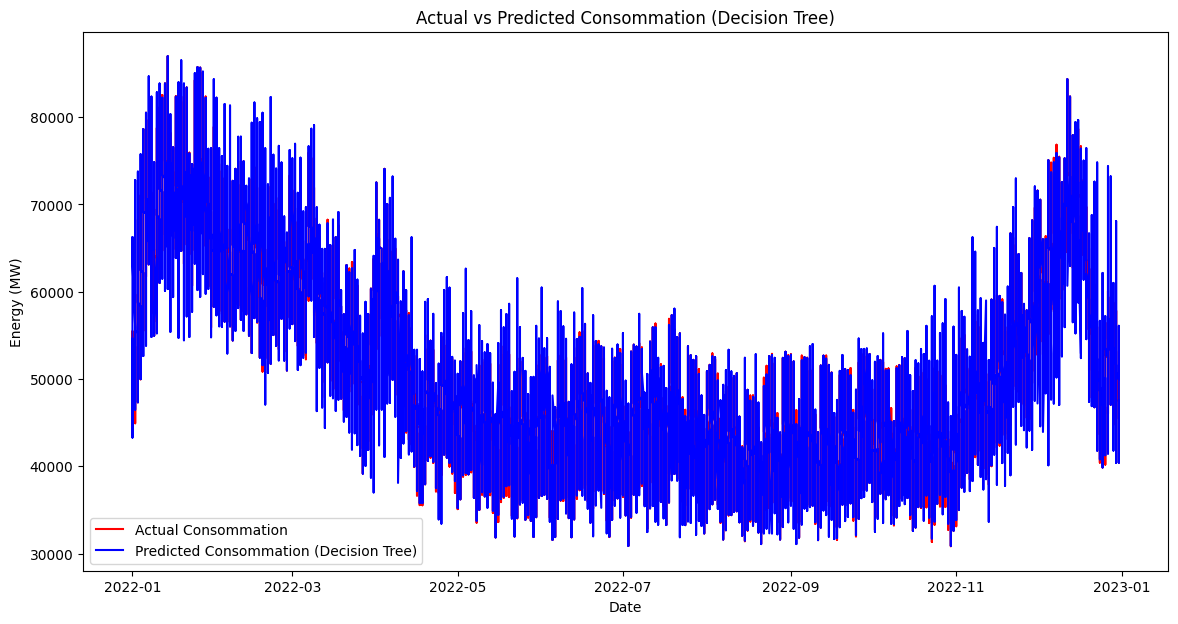

Decision Tree Model Metrics:
MAE: 4412.484394025875
MSE: 31579296.299604498
RMSE: 5619.545915783988


In [23]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Consommation'], color='red', label='Actual Consommation')
plt.plot(df['Date'], dt_model.predict(X), color='blue', label='Predicted Consommation (Decision Tree)')
plt.xlabel('Date')
plt.ylabel('Energy (MW)')
plt.title('Actual vs Predicted Consommation (Decision Tree)')
plt.legend()
plt.show()

print(f'Decision Tree Model Metrics:')
print(f'MAE: {mae_dt}')
print(f'MSE: {mse_dt}')
print(f'RMSE: {rmse_dt}')


c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


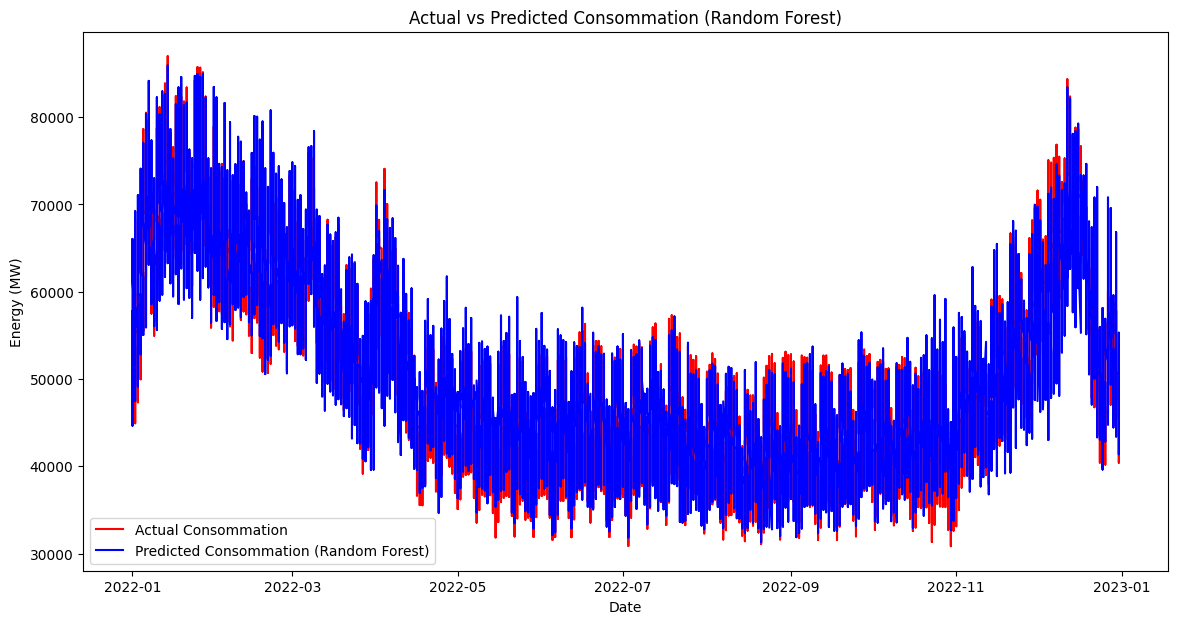

Random Forest Model Metrics:
MAE: 3884.8191609162177
MSE: 24096858.287091807
RMSE: 4908.855089233314


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Consommation'], color='red', label='Actual Consommation')
plt.plot(df['Date'], rf_model.predict(X), color='blue', label='Predicted Consommation (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Energy (MW)')
plt.title('Actual vs Predicted Consommation (Random Forest)')
plt.legend()
plt.show()

print(f'Random Forest Model Metrics:')
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')


c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


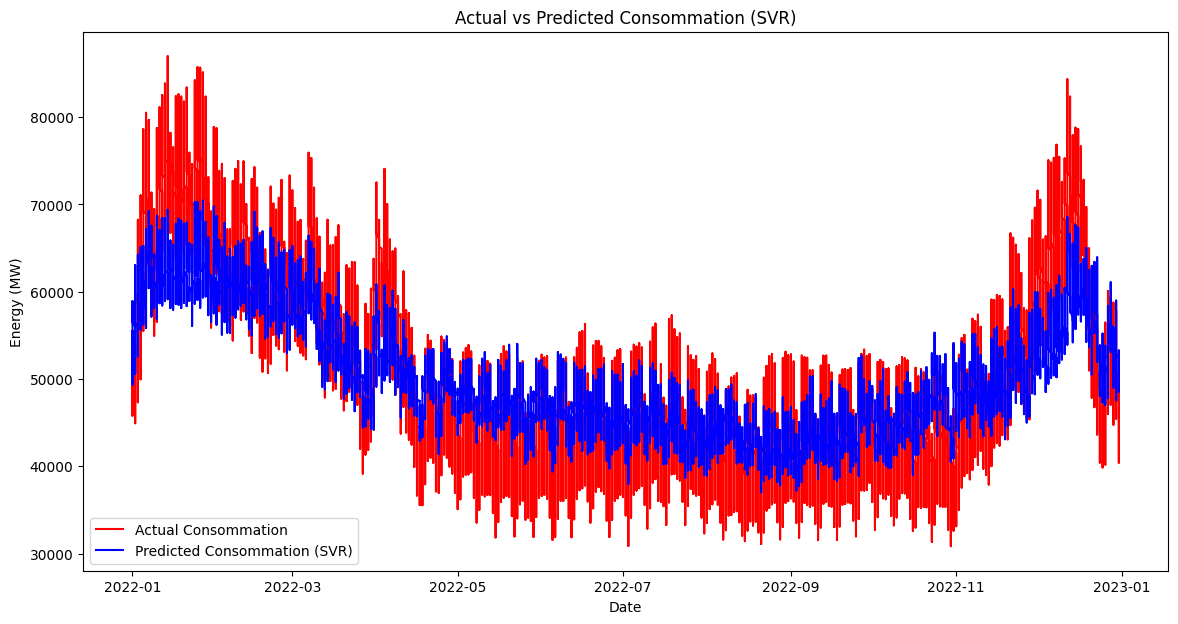

SVR Model Metrics:
MAE: 4210.431270190741
MSE: 28504891.475598887
RMSE: 5338.997235024465


In [25]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features for SVR
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize and train the model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Consommation'], color='red', label='Actual Consommation')
plt.plot(df['Date'], svr_model.predict(scaler_X.transform(X)), color='blue', label='Predicted Consommation (SVR)')
plt.xlabel('Date')
plt.ylabel('Energy (MW)')
plt.title('Actual vs Predicted Consommation (SVR)')
plt.legend()
plt.show()

print(f'SVR Model Metrics:')
print(f'MAE: {mae_svr}')
print(f'MSE: {mse_svr}')
print(f'RMSE: {rmse_svr}')


In [26]:
models = {
    'Linear Regression': model,
    'Decision Tree Regression': dt_model,
    'Random Forest Regression': rf_model,
    'SVR': svr_model
}

results = {}

for name, mdl in models.items():
    y_pred = mdl.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

# Display results
for name, metrics in results.items():
    print(f'{name}:')
    print(f'MAE: {metrics["MAE"]}')
    print(f'MSE: {metrics["MSE"]}')
    print(f'RMSE: {metrics["RMSE"]}')
    print('---')




c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, b

Linear Regression:
MAE: 3306.900731025097
MSE: 17149178.89188826
RMSE: 4141.1567094096135
---
Decision Tree Regression:
MAE: 4412.484394025875
MSE: 31579296.299604498
RMSE: 5619.545915783988
---
Random Forest Regression:
MAE: 3884.8191609162177
MSE: 24096858.287091807
RMSE: 4908.855089233314
---
SVR:
MAE: 353594505.7294016
MSE: 1.3175084546922835e+17
RMSE: 362974992.89789695
---


c:\Users\hey\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
